In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv("GDP_FINLAND.csv")

In [41]:
df.head(3)

,time,geo,unit,s_adj,na_item,value
0,1975Q1,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
1,1975Q2,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
2,1975Q3,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN


### let's drop the background variables and NaN

In [42]:
df = df.drop(["geo", "unit", "s_adj", "na_item"], axis=1)
df = df.dropna()

In [43]:
df

,time,value
60,1990Q1,32134.0
61,1990Q2,31690.0
62,1990Q3,31022.0
63,1990Q4,30837.0
64,1991Q1,30223.0
...,...,...
176,2019Q1,51093.0
177,2019Q2,51513.0
178,2019Q3,51673.0
179,2019Q4,51498.0


### Process the time-variable into quarters and years

In [44]:
# split the date into year and quarter
df['year'] = df['time'].str.slice(0, 4).astype(int)
df['quarter'] = df['time'].str.slice(5, 6).astype(int)
df = df.drop("time", axis=1)

In [45]:
df

,value,year,quarter
60,32134.0,1990,1
61,31690.0,1990,2
62,31022.0,1990,3
63,30837.0,1990,4
64,30223.0,1991,1
...,...,...,...
176,51093.0,2019,1
177,51513.0,2019,2
178,51673.0,2019,3
179,51498.0,2019,4


In [46]:
gdp_pivot = df.pivot_table(index="quarter", columns="year", values="value")

In [47]:
gdp_pivot

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
quarter,,,,,,,,,,,,,,,,,,,,,
1,32134.0,30223.0,29013.0,28307.0,28826.0,30232.0,31480.0,32607.0,35714.0,36783.0,...,48268.0,48191.0,46926.0,46909.0,46726.0,47997.0,49677.0,50806.0,51093.0,50521.0
2,31690.0,29873.0,28692.0,28256.0,29082.0,31048.0,31626.0,33378.0,36145.0,37036.0,...,48195.0,47463.0,47125.0,46884.0,47227.0,48397.0,49866.0,50732.0,51513.0,NaN
3,31022.0,29262.0,28446.0,28429.0,29735.0,30904.0,31999.0,34284.0,35988.0,37372.0,...,48212.0,47360.0,47306.0,47113.0,47310.0,48720.0,50127.0,50859.0,51673.0,NaN
4,30837.0,28923.0,28237.0,28638.0,30487.0,30933.0,32526.0,35385.0,35210.0,38128.0,...,48261.0,47223.0,47164.0,46928.0,47594.0,48959.0,50747.0,51051.0,51498.0,NaN


### Basic correlations don't really show anything but generic trends, not that useful...

<Axes: >

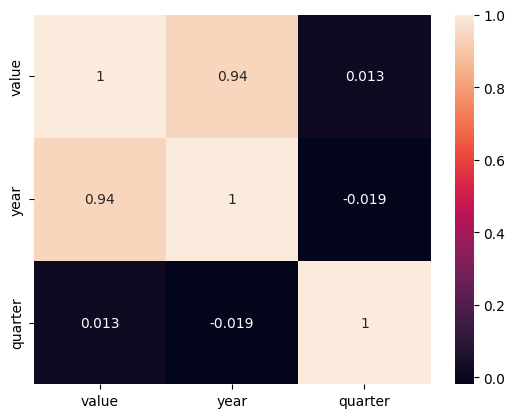

In [48]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Visualize the pivot data, NOW WE CAN SEE the actual events in the history

<Axes: xlabel='year', ylabel='quarter'>

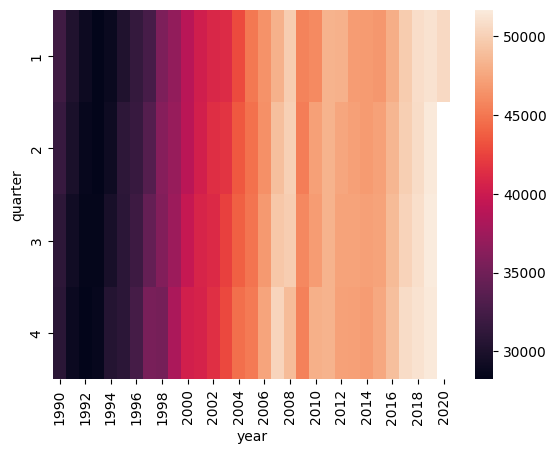

In [ ]:
# for example, the great recession of the 90s, the smaller recession in ~2009
# you can Google / AI these years to verify
sns.heatmap(gdp_pivot)